## Исследование данных о российском кинопрокате



В налачии две таблицы в формате csv с сайта открытых данных Министерства Культуры РФ с различной информацией о прокатных удостоверениях и прокатываемых фильмах \
Необходимо провести структуризацию данных, очистку, приведение к удобному формату \
После возьмёмся за сам анализ 

Цель проекта - проанализировать фильмы, по которым есть информация в госданных. Особый акцент в исследовании будет стоять на фильмах с господдержкой

### Общая информация о датасетах

In [3]:
import pandas as pd # Импорт необходимых библиотек, методова и т.д.
import numpy as np
import matplotlib.pyplot as plt

from pymystem3 import Mystem
m = Mystem()

df_movies = pd.read_csv('/datasets/mkrf_movies.csv')
df_shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [4]:
display(df_movies.info()) # Общая информация о датасетах
display(df_shows.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


None

In [5]:
display(df_movies.head())
display(df_shows.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


Видно, что в данных есть пропуски, нейминг только в одном случае требует изменения (puNumber) \
Приступим к объединению таблиц и последующей очистке данных

In [6]:
df_movies['puNumber'] = pd.to_numeric(df_movies['puNumber'], errors='coerce').fillna(0) # Устраняем возможные ошибки
df_movies['puNumber'] = df_movies['puNumber'].astype(int)

In [7]:
df_movies.query('puNumber == 0') # Посмотрим, сколько таких строк есть

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),0,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
list_of_col = list(df_shows['puNumber'])
df_movies.query('puNumber.isin(@list_of_col)')['puNumber'].count() #Проверим, все ли номера есть в обоих списках

3158

In [9]:
df_full = df_movies.merge(df_shows, on='puNumber', how='outer') # Выбрал метод merge() для слияния

In [10]:
df_full.info() # Проверим результат

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(4), int64(1), object(11)
memory usage: 994.2+ KB


Объединив таблицы, можно приступать к работе по очистке данных

###  Предобработка данных

#### Проверим типы данных


In [11]:
df_full['show_start_date'] = pd.to_datetime(df_full['show_start_date'], format='%Y-%m-%dT%H:%M:%S.000Z')
display(df_full['show_start_date']) # Поменяли формат на datetime и сразу проверили результат

0      2015-11-27 12:00:00
1      2016-09-13 12:00:00
2      2016-10-10 12:00:00
3      2016-06-10 12:00:00
4      2015-07-29 12:00:00
               ...        
7481   2019-12-23 12:00:00
7482   2019-12-24 12:00:00
7483   2019-12-28 12:00:00
7484   2019-12-30 12:00:00
7485   2019-12-30 12:00:00
Name: show_start_date, Length: 7486, dtype: datetime64[ns]

In [12]:
list_of_names = ['refundable_support', 'nonrefundable_support', 'budget', 'box_office']
#for name in list_of_names: # Меняем тип данных здесь на int64
#   df_full.loc[:,name] = df_full.loc[:,name].apply(lambda x: np.int64(x))
#df_full[list_of_names] = df_full[list_of_names].fillna('НЕТ') # Меняем пропуски на строковое значение для корректной замены типа

In [13]:
for name in list_of_names: # Меняем тип данных здесь на int
    df_full.loc[df_full[name] != "НЕТ", name] = np.floor(pd.to_numeric(df_full[name], errors='coerce')).astype('Int64')

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [14]:
def rating_col_cleaning(row): #Функция для замены процентных величин в столбце ratings и замены типа данных на float
    rating = row['ratings']
    if type(rating) == str and '%' in rating:
        rating = rating.replace('%', '')
        rating = float(rating)/10
        return rating
    else:
        return float(rating)

In [15]:
df_full['ratings'] = df_full.apply(rating_col_cleaning, axis=1)

####  Посмотрим на пропуски


Пропуски, по большей части, заменять нечем или незачем. Для поставленных задач те столбцы, где есть пропуски, неважны \
Можно предположить, что пропуски в колоках с финансами, бюджетом и боксофисом - отсутствие оного, поэтому заменю в данном случае нулём

In [16]:
df_full[list_of_names] = df_full[list_of_names].replace('НЕТ', np.nan) # Вернём NaN на место

Касаемо остальных пропусков: \
Столбцы с названием студии, продюссером и режиссёром нам не нужны для поставленных задач, поэтому можно оставить пропуски на месте. (Когда я разберусь с тем, как парсить хотя бы тот же Кинопоиск - можно было бы вытянуть информацию оттуда. Но пока я так не умею) \
Столбцы с господдержкой, бюджетом, сборами и источником финансирования - информации для заполнения нет, вытянуть её неоткуда, средние/медианы и проч. не подходят по природе данных \
Жанры и рейтинги - аналогично с первым случаем

####  Дубликаты

Проверять дубликаты есть смысл только в двух столбцах - номер прокатного удостоверения(он должен быть уникален), название фильма(в теории может повторяться) \
Во всех остальных случаях дубликаты возможны по природе данных 

In [17]:
df_full.duplicated().value_counts() # На всякий случай проверим полных дубликатов

False    7486
dtype: int64

In [18]:
df_full[df_full.duplicated('puNumber')] # Всего два дубликата. Возможно, что это просто человеческая ошибка при заполнении

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


In [19]:
display(df_full[(df_full['puNumber'] == 221054410) | (df_full['puNumber'] == 221154310)])
df_full.drop([4639, 5068], inplace=True)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


In [20]:
df_full[df_full.duplicated('title')]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.4,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"фэнтези,приключения,семейный",759526.0
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,"фэнтези,приключения,семейный",1125302.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.5,"триллер,драма",175003.0
7450,В тихом омуте,121036919,2019-12-09 12:00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",NaN


В случае прокатного удостверения - скорее всего человеческая ошибка \
В случае названия - они могут повторяться, это в целом нормальная ситуация. Их можно отличить по режиссёру, продюссеру и т.д. \
Полных дубликатов в данных нет

####  Посмотрим на категориальные признаки


In [21]:
df_full['type'] = df_full['type'].str.strip() #Следуя подсказке начну со столбца type

In [22]:
df_full['type'].value_counts() #Посмотрим сколько тут уникальных значений, есть ли что-то странное или необычное

Художественный                5907
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

In [23]:
df_full['age_restriction'].value_counts() #Слишком сложные категории, на мой взгляд. Упростим до цифр

«16+» - для детей старше 16 лет           2850
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1592
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

In [24]:
def age_cleaning(row):
    age = row['age_restriction']
    if '0+' in age:
        return 0
    elif '6+' in age:
        return 6
    elif '12+' in age:
        return 12
    elif '16+' in age:
        return 16
    elif '18+' in age:
        return 18

In [25]:
df_full['age_restriction'] = df_full.apply(age_cleaning, axis=1) #Так определённо легче

In [26]:
df_full['genres'].value_counts() # можно заметить, что не использовались пробелы

драма                              476
комедия                            352
мелодрама,комедия                  222
драма,мелодрама,комедия            189
драма,мелодрама                    183
                                  ... 
документальный,криминал,военный      1
фэнтези,семейный,приключения         1
фантастика,боевик,ужасы              1
семейный,приключения,комедия         1
ужасы,фэнтези,приключения            1
Name: genres, Length: 742, dtype: int64

In [27]:
df_full['financing_source'].value_counts() #Тут всё в порядке. На удивление.

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

В категориальных столбцах видна "рука человека". Ошибки, неверное заполнение и т.д. \
И это было заметно практически в каждом столбце \
Но т.к. большая часть информации в датасете для поставленных аналитических задач неважна - можно оставить как есть

####  Проверим количественные значения 


In [28]:
df_full.query('(refundable_support + nonrefundable_support) > budget') #Начнём со столбца бюджет

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",6,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",6,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",12,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,6,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,6,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",18,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957738e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",6,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",12,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",6,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",12,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


Действительно, есть фильмы с якобы нулевым бюджетом, но с наличием господдержки. Непорядок \
Пропуск точно можно в данном случае заменить на сумму возвратной и невозвратной части господдержки

In [29]:
def sum_of_support(row):
    if (row["refundable_support"] + row['nonrefundable_support']) > row['budget']:
        return row[['refundable_support', 'nonrefundable_support']].sum()
    else:
        return row['budget']

In [30]:
df_full['budget'] = df_full.apply(sum_of_support, axis=1) #Заменим в нужных строках значения

Так же есть странные, неровные значения в господдержке. И возвратной, и невозвратной. Но с ними мы сделать ничего не сможем 

In [31]:
df_full['box_office'].value_counts() # 200 рублей сборов? Неплохой "улов"! Но тут мы тоже бессильны что-то менять

0.0            24
200.0          13
300.0          12
360.0           9
250.0           8
               ..
988413.0        1
634644321.0     1
161086.0        1
8335973.0       1
25557823.0      1
Name: box_office, Length: 2938, dtype: int64

####  Добавляем новые необходимые столбцы





In [32]:
df_full['year'] = pd.DatetimeIndex(df_full['show_start_date']).year

In [33]:
df_full[['director', 'genres']] = df_full[['director', 'genres']].fillna('NA')

In [34]:
def dirname_and_genre (row):
    ''' Функция  будет возвращать первые значения из столбцов genres и director
    '''
    name_or_genre = row.split(',')
    
    return name_or_genre[0]

In [35]:
df_full['main_genre'] = df_full['genres'].apply(dirname_and_genre) #Применим созданную функцию к нужным столбцам
df_full['main_director'] = df_full['director'].apply(dirname_and_genre)

In [36]:
df_full[['main_genre', 'main_director']] #Проверим результат

,main_genre,main_director
0,боевик,Кевин Костнер
1,драма,Е.Матвеев
2,фантастика,Тимур Бекмамбетов
3,фантастика,Тимур Бекмамбетов
4,фантастика,Тимур Бекмамбетов
...,...,...
7481,NA,Фил Грабски
7482,боевик,Ник Пауэлл
7483,NA,Чарльз Е.Бастьен
7484,NA,А.Беляев


In [37]:
df_full[['main_genre', 'main_director']] = df_full[['main_genre', 'main_director']].replace('NA', 'NaN')

In [38]:
df_full['gov_part_of_budget'] = (df_full['refundable_support'] + df_full['nonrefundable_support']) / df_full['budget']

In [39]:
df_full['gov_part_of_budget'].value_counts() #Проверим результат 

1.000000    17
0.649351     6
0.657895     5
0.500000     5
0.700000     5
            ..
0.242097     1
0.649872     1
0.595252     1
0.624599     1
0.236345     1
Name: gov_part_of_budget, Length: 282, dtype: int64

###  Анализ 


In [40]:
amount_by_year = df_full.groupby('year')['title'].count()
films_with_boxof_info = df_full.groupby('year')['box_office'].count()
display(amount_by_year)
display(films_with_boxof_info)

year
2010    983
2011    622
2012    593
2013    630
2014    807
2015    705
2016    818
2017    505
2018    891
2019    930
Name: title, dtype: int64

year
2010    105
2011    109
2012    128
2013    184
2014    279
2015    465
2016    526
2017    357
2018    475
2019    530
Name: box_office, dtype: int64

In [41]:
ratio =  films_with_boxof_info / amount_by_year
display(ratio)

year
2010    0.106816
2011    0.175241
2012    0.215852
2013    0.292063
2014    0.345725
2015    0.659574
2016    0.643032
2017    0.706931
2018    0.533109
2019    0.569892
dtype: float64

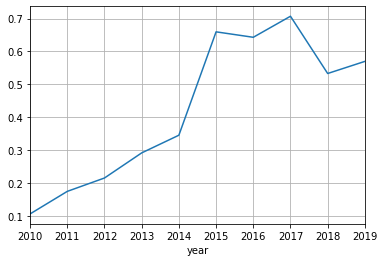

In [42]:
ratio.plot(grid=True)

Видно, что доля с известной информацией непропорционально возрастает каждый год, падая в 2018 году

In [43]:
boxof_sum_pivot = df_full.pivot_table(index='year', values='box_office', aggfunc='sum')
display(boxof_sum_pivot.sort_values('box_office'))

,box_office
year,
2010,2.428654e+06
2012,6.955423e+06
2011,1.410276e+07
2013,2.979970e+07
2014,7.444952e+09
2015,3.949737e+10
2016,4.786630e+10
2019,4.842571e+10
2017,4.856371e+10


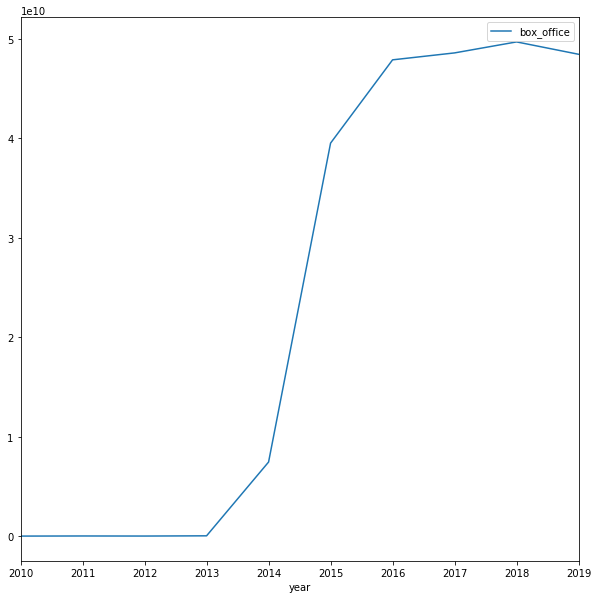

In [44]:
boxof_sum_pivot.plot( figsize=(10,10))

В период с 2014 до 2016 видно взрывной рост сборов

In [45]:
boxof_pivot = df_full.pivot_table(index='year', values='box_office', aggfunc=['mean','median'])
display(boxof_pivot)

,mean,median
,box_office,box_office
year,,
2010,2.313004e+04,1700.0
2011,1.293832e+05,3000.0
2012,5.433924e+04,5660.0
2013,1.619549e+05,3522.5
2014,2.668442e+07,18160.0
2015,8.494057e+07,4920933.0
2016,9.100057e+07,3846679.0
2017,1.360328e+08,9968340.0


По медиане видно, что очень много фильмов с неизвестной информацией было до 2014 года включительно \
Позже ситуация наладилась \
Максимальная средняя величина в 2017 году, минимальная в 2012

In [46]:
box_by_age = df_full.pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc='sum')
display(box_by_age)

age_restriction,0,6,12,18
year,,,,
2010,1887611.0,3.665120e+05,1.201460e+05,5.438500e+04
2011,13499871.0,3.819630e+05,2.198910e+05,1.040000e+03
2012,2266483.0,4.397626e+06,1.087340e+05,1.825800e+05
2013,2710302.0,1.017821e+06,2.091034e+07,5.161245e+06
2014,375562257.0,2.274895e+09,2.584782e+09,2.209713e+09
2015,379054567.0,2.006992e+10,1.361608e+10,5.432308e+09
2016,150228839.0,2.871769e+10,1.220445e+10,6.793930e+09
2017,229598930.0,3.083119e+10,7.851428e+09,9.651496e+09
2018,32449001.0,2.660858e+10,1.426729e+10,8.760085e+09


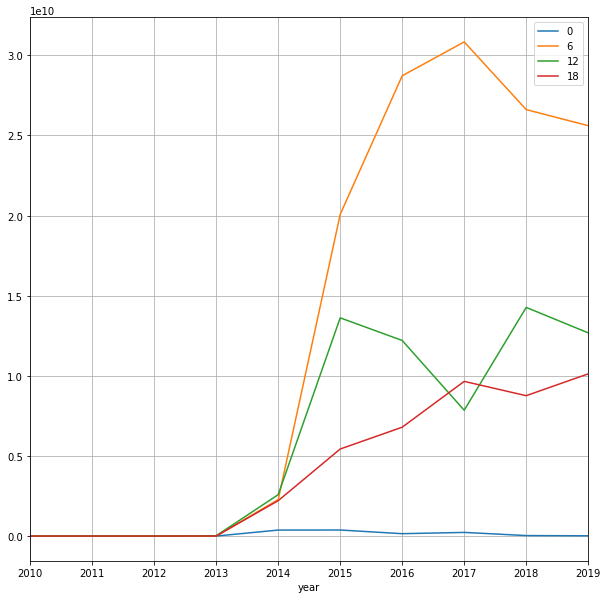

In [47]:
for i in [0, 6, 12, 18]:
    box_by_age[i].plot(grid=True, legend=True, figsize=(10,10))

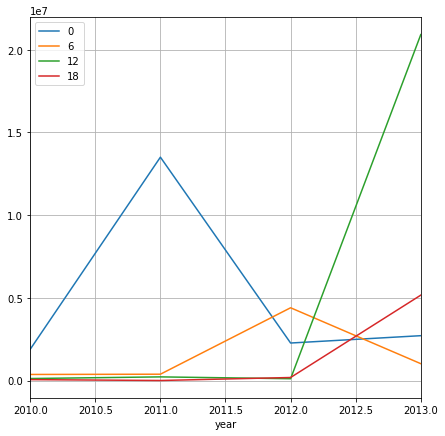

In [48]:
for i in [0, 6, 12, 18]: # Чуть увеличим тот участок, который не видно на основном графике
    box_by_age.loc[2010:2013, i].plot(grid=True, legend=True, figsize=(7,7))

Видно, что постепенно бОльшую часть проката захватывают фильмы в 6+ категории \
И тенденция не особо-то меняется. Возможно, это связано с тем, что это фильмы для самого широкого круга зрителей. И с семьей, и со второй половинкой, и одному. В эту категорию попадают самые разные картины, на любой вкус

###  Исследуем отдельно фильмы с господдержкой


In [49]:
df_gov = df_full.query('refundable_support > 0 or nonrefundable_support > 0')
display(df_gov)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_genre,main_director,gov_part_of_budget
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",6,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.0,2013,драма,А.Атанесян,0.333703
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,12,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NA,28140.0,2014,NaN,А.Якимчук,0.700000
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",12,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.0,2013,комедия,Р.Давлетьяров,0.612691
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,6,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,55917.0,2014,драма,Е.Миндадзе (псевдоним Катя Шагалова),0.690095
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",6,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,232100.0,2014,драма,М.Угаров,0.624764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",12,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",717703185.0,2019,история,А.Кравчук,0.510204
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",6,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",501069235.0,2019,мультфильм,Д.Шмидт,0.526316
7474,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",12,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN,2019,фантастика,Ф.Бондарчук,0.529661
7476,Я свободен,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,12,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN,2019,драма,И.Северов,0.649998


In [50]:
sum_of_sup = df_gov[['refundable_support', 'nonrefundable_support']].sum().sum()
sum_of_boxof = df_gov['box_office'].sum()
print('Общая сумма господдержки:', sum_of_sup)
print('Общие сборы для фильмов с господдержкой:', sum_of_boxof)

Общая сумма господдержки: 20200688312.0
Общие сборы для фильмов с господдержкой: 42113509482.0


In [51]:
gov_rating = df_gov.pivot_table(index='year', values=['ratings', 'gov_part_of_budget'], aggfunc='median')
display(gov_rating)

,gov_part_of_budget,ratings
year,,
2013,0.473197,6.7
2014,0.582085,6.4
2015,0.623736,6.2
2016,0.640000,5.8
2017,0.524780,6.2
2018,0.594160,6.2
2019,0.585982,6.2


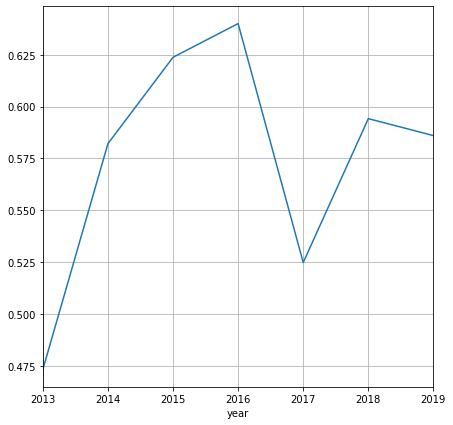

In [52]:
gov_rating['gov_part_of_budget'].plot(grid=True, figsize=(7,7))

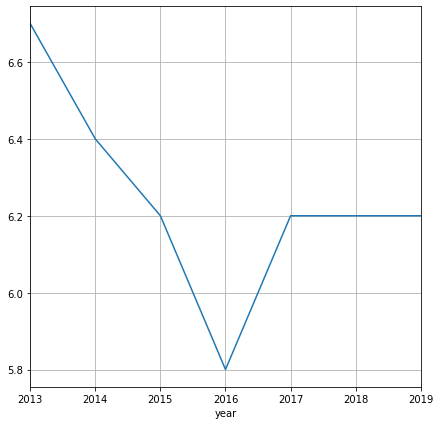

In [53]:
gov_rating['ratings'].plot(grid=True, figsize=(7,7))

Нет заметной тенденции ни к росту, ни к снижению рейтингов \
Госчасть бюджета так же ни растёт, ни падает. Данные имеют разную направленность в зависимости от года

In [54]:
finance_table = df_gov.pivot_table(index='year', values=['refundable_support', 'nonrefundable_support', 'box_office'], aggfunc='sum')
display(finance_table)

,box_office,nonrefundable_support,refundable_support
year,,,
2013,2.032238e+07,1.343479e+08,0.0
2014,1.017422e+09,5.010023e+08,71000000.0
2015,5.785285e+09,3.019088e+09,637153119.0
2016,6.081708e+09,3.381655e+09,921500000.0
2017,1.086508e+10,2.464625e+09,719346881.0
2018,9.934069e+09,2.784969e+09,662000000.0
2019,8.409627e+09,3.976000e+09,928000000.0


Определённо видно, что интерес государства к кино с каждым годом растёт. Сумма поддержки растёт с каждым годом. Причём сумма невозвратной поддержки на порядок выше, чем возвратной \
Причём нельзя сказать, что сборы фильмов с господдержкой каждый год растут. Последние 2 года так вообще падают

In [55]:
df_gov['financing_source'].value_counts()

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

Нельзя сказать, что есть значительный перевес в сторону Фонда кино или Министерства культуры как источника финансирования 

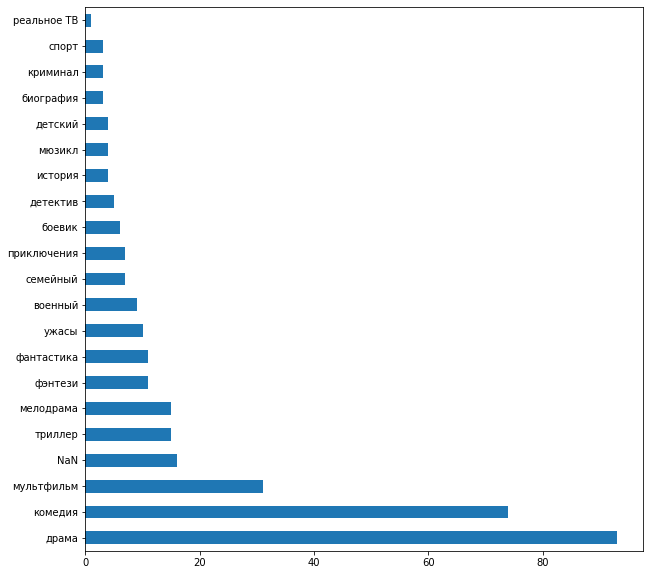

In [56]:
df_gov['main_genre'].value_counts().plot.barh(figsize=(10,10))

Чаще всего с господдержкой снимают драмы и комедии, что, в целом, не удивительно

In [57]:
df_gov['film_studio'].value_counts().head(10) #Посмотрим 10 самых часто финансируемых студий

ООО "Студия анимационного кино "Мельница"    7
ООО "Кинокомпания "СТВ"                      6
ООО "ТаББаК"                                 6
ООО "ВИЗАРТ ФИЛЬМ"                           4
ООО "Каро Продакшн"                          4
ООО "Киностудия "ВЕРТИКАЛЬ"                  4
ООО "Продюсерский центр "Ленфильм"           4
ООО "ЛИЦЕНЗИОННЫЕ БРЕНДЫ"                    3
ООО "Студия "СЛОН"                           3
ООО "Нон-Стоп Продакшн"                      3
Name: film_studio, dtype: int64

In [58]:
df_gov['producer'].value_counts().head(10) #10 самых часто финансируемых продюссеров

С.Сельянов                   8
С.Сельянов, А.Боярский       7
С.Говорухин, Е.Маскина       4
Н.Мокрицкая                  3
ООО "ЛИЦЕНЗИОННЫЕ БРЕНДЫ"    3
С.Еремеева                   3
В.Денисюк, Е.Мелентьев       3
Ю.Обухов, А.Рязанцев         3
Е.Филиппова                  3
А.Тютрюмов                   3
Name: producer, dtype: int64

In [59]:
df_gov['main_director'].value_counts().head(10) #10 самых часто финансируемых режиссёров

Р.Давлетьяров    5
Д.Дьяченко       4
С.Андреасян      4
С.Мокрицкий      3
К.Шипенко        3
А.Цицилин        3
А.Котт           3
Д.Шмидт          3
Н.Хомерики       3
А.Аксененко      3
Name: main_director, dtype: int64

In [60]:
pvt_for_ratio = df_gov.pivot_table(index='year', values=['budget', 'box_office'], aggfunc='sum')
pvt_for_ratio['box_office'] / pvt_for_ratio['budget']

year
2013    0.079560
2014    0.781139
2015    0.747581
2016    0.804997
2017    1.539579
2018    1.419018
2019    0.660985
dtype: float64

Учитывая, что для окупаемости и выхода "в ноль" фильму нужно собрать в два раза больше бюджета - фильмы не окупаются \
Посмотрим, есть ли вообще среди фильмов с господдержкой окупившиеся

In [61]:
good_boxoffice = df_gov.query('(box_office / budget) > 2')
display(good_boxoffice)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_genre,main_director,gov_part_of_budget
1903,Призрак_.,111001815,2015-03-02 12:00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,6,0.0,75000000.0,139551503.0,Фонд кино,7.0,"триллер,боевик,приключения",3.528043e+08,2015,триллер,А.Войтинский,0.537436
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",6,0.0,75000000.0,75000000.0,Фонд кино,6.6,драма,4.461635e+08,2015,драма,Р.Прыгунов,1.000000
2132,Битва за Севастополь,111001415,2015-02-20 12:00:00,Художественный,"ООО ""Кинокомпания ""Новые люди"", ООО ""Студия ""К...",Россия-Украина,С.Мокрицкий,"Н.Мокрицкая, Е.Олесов",12,0.0,27510000.0,131000000.0,Министерство культуры,7.5,"биография,военный,драма",4.018045e+08,2015,биография,С.Мокрицкий,0.210000
2205,8 новых свиданий,111014914,2014-10-30 12:00:00,Художественный,"ООО ""Смарт ТВ Продакшн""",Россия,М.Бальчюнас,"ООО ""Грин Филмс"", ООО ""ПЦ ""Горад""",12,0.0,30000000.0,77401751.0,Фонд кино,6.0,комедия,3.933446e+08,2014,комедия,М.Бальчюнас,0.387588
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",12,10000000.0,70000000.0,80000000.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08,2015,боевик,А.Андрианов,1.000000
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,6,20000000.0,0.0,20000000.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07,2015,комедия,Д.Штурманова,1.000000
2686,Без границ,111010315,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""Небо""",Россия,"Р.Гигинеишвили, К.Оганисян, Р.Прыгунов","Э.Илоян, Э.Родоная, Р.Гигинеишвили, Д.Жалинский",12,10000000.0,40000000.0,80273277.0,Фонд кино,6.8,"комедия,мелодрама",1.909534e+08,2015,комедия,Р.Гигинеишвили,0.622872
2701,Самый Лучший День,111017815,2015-10-14 12:00:00,Художественный,"ООО ""ТаББаК""",Россия,А.Першин (псевдоним Ж.Крыжовников),"Т.Бекмамбетов, А.Першин (псевдоним Ж.Крыжовник...",6,29000000.0,34000000.0,130619336.0,Фонд кино,4.7,"комедия,музыка",6.830291e+08,2015,комедия,А.Першин (псевдоним Ж.Крыжовников),0.482318
2767,Страна чудес,111018415,2015-10-16 12:00:00,Художественный,"ООО ""Ол Медиа Компани""",Россия,Д.Дьяченко,"Г.Шабанов, Р.Татаринцев, Э.Илоян",12,41000000.0,25000000.0,105445546.0,Фонд кино,6.0,"ужасы,комедия",2.945908e+08,2015,ужасы,Д.Дьяченко,0.625915
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",6,0.0,35000000.0,35000000.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07,2015,комедия,С Чекалов,1.000000


Таких фильмов всего 39 \
Чуть больше 1/10 части от всех профинансированных

In [62]:
good_boxoffice['main_director'].value_counts().head() # Режиссёры, которые чаще всего окупаются

Д.Шмидт           2
С.Подгаевский     2
Р.Гигинеишвили    2
Д.Дьяченко        2
Ф.Бондарчук       1
Name: main_director, dtype: int64

###  Общий вывод

Видно, что в данных крайне много "мусора", различных ошибок, пропусков и т.д. \
И всё это в официальных гос.данных 

Определённо видно, что сборы с каждым годом растут, меняются тенденции, жанры и возрастные ограничения. Постепенно, с 2015 до 2019, основную кассу стали собирать фильмы 6+ 

Фильмы с господдержкой окупаются только в 1 случае из 10. Каких-то особых предпочтений для гос поддержки нет, средства выделяют распределённо. Касаемо жанра - больше всего драм и комедий лишь из-за того, что в такие жанры можно "впихнуть" достаточно много фильмов. Видно, что вне зависимости от окупаемости и сборов поддержка только растёт и растёт. Причём невозвратная часть - заметно больше